In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import *
from sympy.physics.mechanics import *
from sympy import sqrt, Rational

# enable LaTeX printing
init_vprinting()

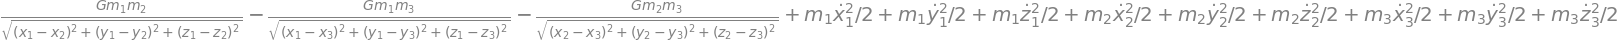

In [5]:
# create symbolic variables
m_1, m_2, m_3, G, t = symbols('m_1 m_2 m_3 G t')

# dynamic symbols
x_1, x_2, x_3, y_1, y_2, y_3, z_1, z_2, z_3 = dynamicsymbols('x_1 x_2 x_3 y_1 y_2 y_3 z_1 z_2 z_3')


def mag(x, y, z):
    mean = sqrt(x**2 + y**2 + z**2)
    return mean

# calculate distances d:
d1_2 = mag((x_2 - x_1), (y_2 - y_1), (z_2 - z_1))
d2_3 = mag((x_3 - x_2), (y_3 - y_2), (z_3 - z_2))
d3_1 = mag((x_1 - x_3), (y_1 - y_3), (z_1 - z_3))

# derivatives
x_1_dot = diff(x_1, t)
x_1_ddot = diff(x_1_dot, t)

x_2_dot = diff(x_2, t)
x_2_ddot = diff(x_2_dot, t)

x_3_dot = diff(x_3, t)
x_3_ddot = diff(x_3_dot, t)

y_1_dot = diff(y_1, t)
y_1_ddot = diff(y_1_dot, t)

y_2_dot = diff(y_2, t)
y_2_ddot = diff(y_2_dot, t)

y_3_dot = diff(y_3, t)
y_3_ddot = diff(y_3_dot, t)

z_1_dot = diff(z_1, t)
z_1_ddot = diff(z_1_dot, t)

z_2_dot = diff(z_2, t)
z_2_ddot = diff(z_2_dot, t)

z_3_dot = diff(z_3, t)
z_3_ddot = diff(z_3_dot, t)

# Lagrangian
T = Rational(1,2)*(m_1*(mag(x_1_dot, y_1_dot, z_1_dot))**2 + m_2*(mag(x_2_dot, y_2_dot, z_2_dot))**2 + m_3*(mag(x_3_dot, y_3_dot, z_3_dot))**2)
V_1 = -G*(m_1*m_2)/d1_2
V_2 = -G*(m_2*m_3)/d2_3
V_3 = -G*(m_3*m_1)/d3_1
L = T - V_1 + V_2 + V_3

# Simplify the Lagrangian
L = simplify(L)
L

In [17]:
# Euler-Lagrange Equation
eqn_1 = diff(diff(L, x_1_dot), t) - diff(L, x_1)
print("equation 1:  {eqn_1}")
eqn_2 = diff(diff(L, x_2_dot), t) - diff(L, x_2)
print("equation 2:  {eqn_2}")
eqn_3 = diff(diff(L, x_3_dot), t) - diff(L, y_3)
print("equation 3:  {eqn_3}")
eqn_4 = diff(diff(L, y_1_dot), t) - diff(L, y_1)
print("equation 4:  {eqn_4}")
eqn_5 = diff(diff(L, y_2_dot), t) - diff(L, y_2)
print("equation 5:  {eqn_5}")
eqn_6 = diff(diff(L, y_3_dot), t) - diff(L, y_3)
print("equation 6:  {eqn_6}")
eqn_7 = diff(diff(L, z_1_dot), t) - diff(L, z_1)
print("equation 7:  {eqn_7}")
eqn_8 = diff(diff(L, z_2_dot), t) - diff(L, z_2)
print("equation 8:  {eqn_8}")
eqn_9 = diff(diff(L, z_3_dot), t) - diff(L, z_3)
print(eqn_9)

sln= solve([eqn_1], [x_1_ddot])
#sln = solve([eqn_1, eqn_2, eqn_3, eqn_4, eqn_5, eqn_6, eqn_7, eqn_8, eqn_9], [x_1_ddot, x_2_ddot, x_3_ddot, y_1_ddot, y_2_ddot, y_3_ddot, z_1_ddot, z_2_ddot, z_3_ddot])
print(sln)
# show the solution
#f = Matrix([x_1_dot, sln[x_1_ddot], x_2_dot, sln[x_2_ddot], x_3_dot, sln[x_3_ddot], y_1_dot, sln[y_1_ddot], y_2_dot, sln[y_2_ddot], y_3_dot, sln[y_3_ddot], z_1_dot, sln[z_1_ddot], z_2_dot, sln[z_2_ddot], z_3_dot, sln[z_3_ddot]])
f = Matrix([x_1_dot, sln[x_1_ddot]])
f = simplify(f)
#x = Matrix([x_1, x_1_dot, x_2, x_2_dot, x_3, x_3_dot, y_1, y_1_dot, y_2, y_2_dot, y_3, y_3_dot, z_1, z_1_dot, z_2, z_2_dot, z_3, z_3_dot])
x = Matrix([x_1, x_1_dot])
x_dot = diff(x, t)

Eq(x_dot, f)

equation 1:  {eqn_1}
equation 2:  {eqn_2}
equation 3:  {eqn_3}
equation 4:  {eqn_4}
equation 5:  {eqn_5}
equation 6:  {eqn_6}
equation 7:  {eqn_7}
equation 8:  {eqn_8}
G*m_1*m_3*(z_1(t) - z_3(t))/((x_1(t) - x_3(t))**2 + (y_1(t) - y_3(t))**2 + (z_1(t) - z_3(t))**2)**(3/2) + G*m_2*m_3*(z_2(t) - z_3(t))/((x_2(t) - x_3(t))**2 + (y_2(t) - y_3(t))**2 + (z_2(t) - z_3(t))**2)**(3/2) + m_3*Derivative(z_3(t), (t, 2))
{Derivative(x_1(t), (t, 2)): -G*m_2*sqrt(x_1(t)**2 - 2*x_1(t)*x_3(t) + x_3(t)**2 + y_1(t)**2 - 2*y_1(t)*y_3(t) + y_3(t)**2 + z_1(t)**2 - 2*z_1(t)*z_3(t) + z_3(t)**2)*x_1(t)**3/(sqrt(x_1(t)**2 - 2*x_1(t)*x_2(t) + x_2(t)**2 + y_1(t)**2 - 2*y_1(t)*y_2(t) + y_2(t)**2 + z_1(t)**2 - 2*z_1(t)*z_2(t) + z_2(t)**2)*sqrt(x_1(t)**2 - 2*x_1(t)*x_3(t) + x_3(t)**2 + y_1(t)**2 - 2*y_1(t)*y_3(t) + y_3(t)**2 + z_1(t)**2 - 2*z_1(t)*z_3(t) + z_3(t)**2)*x_1(t)**4 - 2*sqrt(x_1(t)**2 - 2*x_1(t)*x_2(t) + x_2(t)**2 + y_1(t)**2 - 2*y_1(t)*y_2(t) + y_2(t)**2 + z_1(t)**2 - 2*z_1(t)*z_2(t) + z_2(t)**2)*sqrt(x_1

       ⎡                                                                       ↪
       ⎢                                                                       ↪
       ⎢  ⎛        ___________________________________________________________ ↪
⎡x₁̇⎤   ⎢  ⎜       ╱   2               2     2               2     2            ↪
⎢  ⎥ = ⎢G⋅⎝- m₂⋅╲╱  x₁  - 2⋅x₁⋅x₃ + x₃  + y₁  - 2⋅y₁⋅y₃ + y₃  + z₁  - 2⋅z₁⋅z₃  ↪
⎣x₁̈⎦   ⎢────────────────────────────────────────────────────────────────────── ↪
       ⎢                                                                       ↪
       ⎢                                                                       ↪
       ⎣                                                                       ↪

↪                                                                              ↪
↪                                                                              ↪
↪ ______             _________________________________________________________ ↪
↪     2    3        ╱   2

In [24]:
g = f.subs({x_1: 'x_1', x_1_dot: 'x_1_dot', x_2: 'x_2', x_2_dot: 'x_2_dot', y_1: 'y_1', y_1_dot: 'y_1_dot', y_2: 'y_2', y_2_dot: 'y_2_dot', z_1: 'z_1', z_1_dot: 'z_1_dot', z_2: 'z_2', z_2_dot: 'z_2_dot'})
ODE=[]
for i in range(12):
    ODE.append(g[i])
    print('f[{}] = {}'.format(i, g[i]))
ODE = tuple(ODE)
%store ODE


f[0] = x_1_dot
f[1] = G*m_2*(-x_1 + x_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2)
f[2] = x_2_dot
f[3] = G*m_1*(x_1 - x_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2)
f[4] = y_1_dot
f[5] = G*m_2*(-y_1 + y_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2)
f[6] = y_2_dot
f[7] = G*m_1*(y_1 - y_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2)
f[8] = z_1_dot
f[9] = G*m_2*(-z_1 + z_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2)
f[10] = z_2_dot
f[11] = G*m_1*(z_1 - z_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2)
Stored 'ODE' (tuple)
